## Section 7. Logistic Regression


## Objective
1. **분류 문제를 푸는 기본적인 머신러닝인 Logistic Regression에 대해 알아봅니다. **
2. **실제로 구현하여 그 결과를 확인합니다.**

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 문제 1. Iris Dataset 을 이용해 Iris 종 구별(classification)하기

* Iris 데이터는 4개의 features 을 가지고 있습니다.
    1. sepal length in cm 
    2. sepal width in cm 
    3. petal length in cm 
    4. petal width in cm 

* Iris 데이터는 labels 은 3가지 class로 나뉘어 집니다. 
    * Iris Setosa 
    * Iris Versicolour 
    * Iris Virginica
![Imgur](https://i.imgur.com/EO2cI4i.png)

### Requirements


1. [Iris data](https://archive.ics.uci.edu/ml/datasets/iris) 을 이용해 
**Numpy** 을 이용해 **Iris setosa Vs Iris Versicolour** 을 구별하는 **logistic regression** 모델을 생성 합니다.
2. cost 와 Accuracy 을 측정 합니다. 
3. cost 와 Accuracy 을 시각화 합니다. 


In [0]:
# 아래 코드를 실행해 주세요
np.random.seed(1)
iris = load_iris()

xs = iris['data']
ys = iris['target']
ys_name = iris['target_names']
ys_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### 답안지 입력란
* 아래에 답을 서술하여 주세요


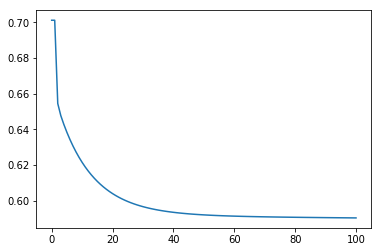

In [0]:
# 정답을 입력해 주세요
ys = ys.reshape(-1,1)
temp = np.concatenate([xs,ys], axis=1)

# min-max
max_value = np.max(temp, axis=0).reshape(1,-1)
min_value = np.min(temp, axis=0).reshape(1,-1)

# normalization
T = (temp - min_value) / (max_value - min_value)

# independent value setting
X = T[:,:-1]
X = np.concatenate([np.ones([np.shape(X)[0],1]),X], axis=1)

# dependent value setting
Y = T[:,-1:]

# setting initial weight
W = np.random.random(size=[np.shape(X)[1],1])

# logistic regression model
z = np.matmul(X, W)    
prob = 1/(1+np.exp(-z))

# loss function
crossentropy = -np.mean(Y*np.log(prob) + (1-Y)*np.log(1-prob))
crossentropy
# differencial function
dW = np.mean((np.matmul(X,W)-Y)*X, axis=0)

# history setting initials
w_history = [W]
loss_history = [crossentropy]

alpha = 5e-1
epoch = 100

for i in range(epoch):
    # getting prior weight
    old_W = w_history[-1]

    # logistic regression model renewal
    z = np.matmul(X, old_W)    
    prob = 1/(1+np.exp(-z))

    # differencial function
    dW = np.mean((np.matmul(X,old_W)-Y)*X, axis=0)
    dW = dW.reshape(-1,1)
    
    # Gradient Descent training
    new_W = old_W - alpha * dW

    # loss function renewal
    crossentropy = -np.mean(Y*np.log(prob) + (1-Y)*np.log(1-prob))

    # saving result
    w_history.append(new_W)
    loss_history.append(crossentropy)
    

# 결과 확인
plt.plot(loss_history)
# plt.plot(prob)
plt.show()


#### 정답 확인
* Cost는 0.5 아래로 떨어져야 합니다.
* Accuracy는 100%가 나올 수 있습니다. 

아래와 같은 그림이 나오면 성공 입니다.


![Imgur](https://i.imgur.com/jVvhXnY.png)

In [0]:
"""comment
아래와 같이 반복되는 코드는 메서드로 extract해주시는 것이 좋을 것 같습니다!
dW, crossentropy, prob
메서드의 명명법은 get_dW, get_crossentropy정도로 해주시면 되겠습니다!
코드 스타일 혹은 코딩 컨벤션이라고 하는데요!
프로젝트 수행시 팀과 협의하여 컨벤션을 통일 하는것이 일반적인 것으로 알고 있습니다.
외에 대부분 코드는 깔끔하게 잘 작성 해주셨습니다!
감사합니다.
"""